In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [3]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [4]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]

In [5]:
cut = 0
y1 = (Y <= cut) * 1
y2 = (Y > cut) * (-1) * (-Y)
Y2 = np.stack((y1, y2), axis=-1)

y1_val = (Y_val <= cut) * 1
y2_val = (Y_val > cut) * (-1) * (-Y_val)
Y2_val = np.stack((y1_val, y2_val), axis=-1)

In [6]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit5_nn import fit, comb_error

In [7]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc11 = nn.Linear(17, 24, bias = True)
        self.fc12 = nn.Linear(24, 1, bias = True)
        
        self.fc21 = nn.Linear(16, 24, bias=True)
        self.fc22 = nn.Linear(24, 5, bias=True)
        self.fc23 = nn.Linear(5, 1, bias=True)
                
    def forward(self, x):        
               
        x2 = self.fc21(x)
        x2 = F.relu(self.fc22(x2)) 
        x2 = self.fc23(x2)
        
        x1 = torch.cat((x2, x), 1)
        x1 = torch.tanh(self.fc11(x1))
        
        x1 = torch.sigmoid(self.fc12(x1))        
        x2 = torch.exp(x2)        
        x3 = torch.cat((x1, x2), 1)
        return x3

In [8]:
n_epochs = 5000
lr = 0.001
verbose = 1
n_batches = 6
batch_to_avg = 2
ep_to_check = 10
clipping = 0.20
sig2 = 950000
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
def m_error(output, target):
    return comb_error(output, target, sig2)

In [ ]:
net = Net1()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

#PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
#net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X=X2, X_val=X2_val, Y=Y2, Y_val=Y2_val, net=net, optimizer=optimizer, error=m_error, 
                n_epochs=n_epochs, n_batches=n_batches, batch_to_avg=batch_to_avg, 
                    ep_to_check=ep_to_check, clipping=clipping, PATH=PATH, device=device, 
                                            verbose=verbose, min_val_loss = float('inf'))

Epoch 1: Training Loss: 1.064463347196579, Validation Loss: 1.1504755020141602
Epoch 2: Training Loss: 1.0623390177885692, Validation Loss: 1.147655963897705
Epoch 3: Training Loss: 1.0586977104345958, Validation Loss: 1.1437939405441284
Epoch 4: Training Loss: 1.0538938840230305, Validation Loss: 1.1392420530319214
Epoch 5: Training Loss: 1.048427055279414, Validation Loss: 1.1342625617980957
Epoch 6: Training Loss: 1.0425731539726257, Validation Loss: 1.1290446519851685
Epoch 7: Training Loss: 1.0364724099636078, Validation Loss: 1.1237255334854126
Epoch 8: Training Loss: 1.0303880373636882, Validation Loss: 1.1184030771255493
Epoch 9: Training Loss: 1.0241055687268574, Validation Loss: 1.1131460666656494
Epoch 10: Training Loss: 1.0180270572503407, Validation Loss: 1.10800302028656
Epoch 11: Training Loss: 1.0119908849398296, Validation Loss: 1.1030062437057495
New Checkpoint Saved into PATH
Epoch 12: Training Loss: 1.0061087310314178, Validation Loss: 1.098177433013916
Epoch 13: Tr

Epoch 100: Training Loss: 0.8718584775924683, Validation Loss: 0.9823375344276428
Epoch 101: Training Loss: 0.8713932732741038, Validation Loss: 0.9818788766860962
New Checkpoint Saved into PATH
Epoch 102: Training Loss: 0.870945562918981, Validation Loss: 0.9814427495002747
Epoch 103: Training Loss: 0.870505154132843, Validation Loss: 0.9809895753860474
Epoch 104: Training Loss: 0.8700655102729797, Validation Loss: 0.9805585145950317
Epoch 105: Training Loss: 0.8696677982807159, Validation Loss: 0.9801707863807678
Epoch 106: Training Loss: 0.8692899147669474, Validation Loss: 0.9797600507736206
Epoch 107: Training Loss: 0.8688850204149882, Validation Loss: 0.9793704748153687
Epoch 108: Training Loss: 0.8685152729352316, Validation Loss: 0.9790014624595642
Epoch 109: Training Loss: 0.8681691487630209, Validation Loss: 0.97865229845047
Epoch 110: Training Loss: 0.8677958150704702, Validation Loss: 0.9783072471618652
Epoch 111: Training Loss: 0.8675038913885752, Validation Loss: 0.977943

Epoch 197: Training Loss: 0.8584119180838267, Validation Loss: 0.9685932397842407
Epoch 198: Training Loss: 0.8583783408006033, Validation Loss: 0.9685620665550232
Epoch 199: Training Loss: 0.858340452114741, Validation Loss: 0.9685114622116089
Epoch 200: Training Loss: 0.8583024938901266, Validation Loss: 0.968460202217102
Epoch 201: Training Loss: 0.8582720557848612, Validation Loss: 0.9684156775474548
New Checkpoint Saved into PATH
Epoch 202: Training Loss: 0.8582357962926229, Validation Loss: 0.9683818817138672
Epoch 203: Training Loss: 0.8582026362419128, Validation Loss: 0.9683555960655212
Epoch 204: Training Loss: 0.8581690490245819, Validation Loss: 0.9683171510696411
Epoch 205: Training Loss: 0.8581372698148092, Validation Loss: 0.968278169631958
Epoch 206: Training Loss: 0.8581007321675619, Validation Loss: 0.9682504534721375
Epoch 207: Training Loss: 0.8580718338489532, Validation Loss: 0.9682183265686035
Epoch 208: Training Loss: 0.8580417732397715, Validation Loss: 0.96819

Epoch 294: Training Loss: 0.8560143013795217, Validation Loss: 0.9662209749221802
Epoch 295: Training Loss: 0.8559973239898682, Validation Loss: 0.9661933183670044
Epoch 296: Training Loss: 0.8559793730576833, Validation Loss: 0.9661792516708374
Epoch 297: Training Loss: 0.8559623062610626, Validation Loss: 0.966159462928772
Epoch 298: Training Loss: 0.8559479216734568, Validation Loss: 0.9661630988121033
Epoch 299: Training Loss: 0.8559277256329855, Validation Loss: 0.9661402106285095
Epoch 300: Training Loss: 0.8559077183405558, Validation Loss: 0.9661269187927246
Epoch 301: Training Loss: 0.8558959563573202, Validation Loss: 0.9661018252372742
New Checkpoint Saved into PATH
Epoch 302: Training Loss: 0.8558749059836069, Validation Loss: 0.9661053419113159
Epoch 303: Training Loss: 0.8558559318383535, Validation Loss: 0.9660964608192444
Epoch 304: Training Loss: 0.8558417161305746, Validation Loss: 0.9660794138908386
Epoch 305: Training Loss: 0.85582168896993, Validation Loss: 0.96605

Epoch 391: Training Loss: 0.854588786760966, Validation Loss: 0.9648568034172058
New Checkpoint Saved into PATH
Epoch 392: Training Loss: 0.8545762896537781, Validation Loss: 0.9648401141166687
Epoch 393: Training Loss: 0.8545735975106558, Validation Loss: 0.964809238910675
Epoch 394: Training Loss: 0.8545570969581604, Validation Loss: 0.9647904634475708
Epoch 395: Training Loss: 0.854543129603068, Validation Loss: 0.9647877812385559
Epoch 396: Training Loss: 0.8545287549495697, Validation Loss: 0.9647786021232605
Epoch 397: Training Loss: 0.8545179665088654, Validation Loss: 0.9647799730300903
Epoch 398: Training Loss: 0.8545120557149252, Validation Loss: 0.964783787727356
Epoch 399: Training Loss: 0.8544952074686686, Validation Loss: 0.9647637009620667
Epoch 400: Training Loss: 0.8544816573460897, Validation Loss: 0.9647486805915833
Epoch 401: Training Loss: 0.8544707198937734, Validation Loss: 0.9647409915924072
New Checkpoint Saved into PATH
Epoch 402: Training Loss: 0.854458163181

Epoch 488: Training Loss: 0.8535772760709127, Validation Loss: 0.9638554453849792
Epoch 489: Training Loss: 0.853566179672877, Validation Loss: 0.9638488292694092
Epoch 490: Training Loss: 0.8535614907741547, Validation Loss: 0.9638505578041077
Epoch 491: Training Loss: 0.8535496493180593, Validation Loss: 0.9638323187828064
New Checkpoint Saved into PATH
Epoch 492: Training Loss: 0.8535426557064056, Validation Loss: 0.9638121128082275
Epoch 493: Training Loss: 0.8535321354866028, Validation Loss: 0.9637965559959412
Epoch 494: Training Loss: 0.8535212079683939, Validation Loss: 0.9637889862060547
Epoch 495: Training Loss: 0.8535119195779165, Validation Loss: 0.9637885093688965
Epoch 496: Training Loss: 0.8535060981909434, Validation Loss: 0.9637913703918457
Epoch 497: Training Loss: 0.8534966011842092, Validation Loss: 0.9637800455093384
Epoch 498: Training Loss: 0.8534868061542511, Validation Loss: 0.963778018951416
Epoch 499: Training Loss: 0.8534767329692841, Validation Loss: 0.9637

Epoch 585: Training Loss: 0.8527656296888987, Validation Loss: 0.9630289077758789
Epoch 586: Training Loss: 0.8527618646621704, Validation Loss: 0.9630337953567505
Epoch 587: Training Loss: 0.8527490695317587, Validation Loss: 0.9630229473114014
Epoch 588: Training Loss: 0.8527455727259318, Validation Loss: 0.9630224704742432
Epoch 589: Training Loss: 0.8527342776457468, Validation Loss: 0.9630117416381836
Epoch 590: Training Loss: 0.8527292112509409, Validation Loss: 0.9630109071731567
Epoch 591: Training Loss: 0.8527199427286783, Validation Loss: 0.9630078673362732
New Checkpoint Saved into PATH
Epoch 592: Training Loss: 0.8527247508366903, Validation Loss: 0.9629814624786377
Epoch 593: Training Loss: 0.8527049124240875, Validation Loss: 0.9629711508750916
Epoch 594: Training Loss: 0.8526968856652578, Validation Loss: 0.9629683494567871
Epoch 595: Training Loss: 0.8526891867319742, Validation Loss: 0.9629675149917603
Epoch 596: Training Loss: 0.852682868639628, Validation Loss: 0.962

Epoch 682: Training Loss: 0.8520673712094625, Validation Loss: 0.9623504877090454
Epoch 683: Training Loss: 0.8520573278268179, Validation Loss: 0.9623458385467529
Epoch 684: Training Loss: 0.8520528475443522, Validation Loss: 0.9623407125473022
Epoch 685: Training Loss: 0.852055678764979, Validation Loss: 0.9623468518257141
Epoch 686: Training Loss: 0.8520393669605255, Validation Loss: 0.9623266458511353
Epoch 687: Training Loss: 0.8520332276821136, Validation Loss: 0.9623169302940369
Epoch 688: Training Loss: 0.8520245353380839, Validation Loss: 0.9623052477836609
Epoch 689: Training Loss: 0.8520199954509735, Validation Loss: 0.9622921943664551
Epoch 690: Training Loss: 0.8520139853159586, Validation Loss: 0.9622899293899536
Epoch 691: Training Loss: 0.8520084619522095, Validation Loss: 0.962273120880127
New Checkpoint Saved into PATH
Epoch 692: Training Loss: 0.8520037631193796, Validation Loss: 0.962260901927948
Epoch 693: Training Loss: 0.8519963622093201, Validation Loss: 0.96226

Epoch 779: Training Loss: 0.8514314393202463, Validation Loss: 0.9617106914520264
Epoch 780: Training Loss: 0.8514299790064493, Validation Loss: 0.9616917371749878
Epoch 781: Training Loss: 0.8514173229535421, Validation Loss: 0.9616856575012207
New Checkpoint Saved into PATH
Epoch 782: Training Loss: 0.851412167151769, Validation Loss: 0.9616846442222595
Epoch 783: Training Loss: 0.8514114022254944, Validation Loss: 0.9616715908050537
Epoch 784: Training Loss: 0.8514052033424377, Validation Loss: 0.9616658091545105
Epoch 785: Training Loss: 0.8513944248358408, Validation Loss: 0.9616568684577942
Epoch 786: Training Loss: 0.851385494073232, Validation Loss: 0.9616580605506897
Epoch 787: Training Loss: 0.8513828913370768, Validation Loss: 0.961663007736206
Epoch 788: Training Loss: 0.8513745665550232, Validation Loss: 0.9616658091545105
Epoch 789: Training Loss: 0.8513695895671844, Validation Loss: 0.961656391620636
Epoch 790: Training Loss: 0.8513623972733816, Validation Loss: 0.961650

Epoch 876: Training Loss: 0.8508444527784983, Validation Loss: 0.961112916469574
Epoch 877: Training Loss: 0.8508372902870178, Validation Loss: 0.9611086249351501
Epoch 878: Training Loss: 0.8508304754892985, Validation Loss: 0.9611037373542786
Epoch 879: Training Loss: 0.8508243262767792, Validation Loss: 0.9610999822616577
Epoch 880: Training Loss: 0.8508284787336985, Validation Loss: 0.9610852599143982
Epoch 881: Training Loss: 0.850820928812027, Validation Loss: 0.9610915780067444
New Checkpoint Saved into PATH
Epoch 882: Training Loss: 0.8508088886737823, Validation Loss: 0.9610924124717712
Epoch 883: Training Loss: 0.8508009115854899, Validation Loss: 0.9610852599143982
Epoch 884: Training Loss: 0.8507957855860392, Validation Loss: 0.9610786437988281
Epoch 885: Training Loss: 0.8507921894391378, Validation Loss: 0.9610671997070312
Epoch 886: Training Loss: 0.8507879475752512, Validation Loss: 0.9610555171966553
Epoch 887: Training Loss: 0.8507783810297648, Validation Loss: 0.9610

Epoch 973: Training Loss: 0.8502886494000753, Validation Loss: 0.9605634808540344
Epoch 974: Training Loss: 0.8502810200055441, Validation Loss: 0.9605554938316345
Epoch 975: Training Loss: 0.8502760529518127, Validation Loss: 0.9605485796928406
Epoch 976: Training Loss: 0.850269615650177, Validation Loss: 0.9605456590652466
Epoch 977: Training Loss: 0.8502636353174845, Validation Loss: 0.9605380892753601
Epoch 978: Training Loss: 0.8502629597981771, Validation Loss: 0.9605391025543213
Epoch 979: Training Loss: 0.8502536217371622, Validation Loss: 0.9605318903923035
Epoch 980: Training Loss: 0.8502493798732758, Validation Loss: 0.9605264067649841
Epoch 981: Training Loss: 0.8502413431803385, Validation Loss: 0.9605193734169006
New Checkpoint Saved into PATH
Epoch 982: Training Loss: 0.8502355317274729, Validation Loss: 0.960512101650238
Epoch 983: Training Loss: 0.8502439757188162, Validation Loss: 0.9605110883712769
Epoch 984: Training Loss: 0.8502245744069418, Validation Loss: 0.9604

Epoch 1069: Training Loss: 0.8497651815414429, Validation Loss: 0.9600444436073303
Epoch 1070: Training Loss: 0.8497611383597056, Validation Loss: 0.9600364565849304
Epoch 1071: Training Loss: 0.8497554560502371, Validation Loss: 0.9600293636322021
New Checkpoint Saved into PATH
Epoch 1072: Training Loss: 0.8497506380081177, Validation Loss: 0.9600279331207275
Epoch 1073: Training Loss: 0.8497534890969595, Validation Loss: 0.9600169062614441
Epoch 1074: Training Loss: 0.8497412999471029, Validation Loss: 0.9600111246109009
Epoch 1075: Training Loss: 0.8497402171293894, Validation Loss: 0.9600145220756531
Epoch 1076: Training Loss: 0.8497306605180105, Validation Loss: 0.960010826587677
Epoch 1077: Training Loss: 0.8497241735458374, Validation Loss: 0.960010290145874
Epoch 1078: Training Loss: 0.8497184912363688, Validation Loss: 0.9600058794021606
Epoch 1079: Training Loss: 0.8497134546438853, Validation Loss: 0.9599960446357727
Epoch 1080: Training Loss: 0.8497112691402435, Validation 

Epoch 1165: Training Loss: 0.8492691516876221, Validation Loss: 0.9595461487770081
Epoch 1166: Training Loss: 0.8492654661337534, Validation Loss: 0.9595383405685425
Epoch 1167: Training Loss: 0.849258561929067, Validation Loss: 0.9595348238945007
Epoch 1168: Training Loss: 0.8492584625879923, Validation Loss: 0.9595276117324829
Epoch 1169: Training Loss: 0.8492488265037537, Validation Loss: 0.9595215320587158
Epoch 1170: Training Loss: 0.8492453992366791, Validation Loss: 0.9595173597335815
Epoch 1171: Training Loss: 0.8492390811443329, Validation Loss: 0.9595125317573547
New Checkpoint Saved into PATH
Epoch 1172: Training Loss: 0.8492428859074911, Validation Loss: 0.9595047831535339
Epoch 1173: Training Loss: 0.8492295543352762, Validation Loss: 0.9595018625259399
Epoch 1174: Training Loss: 0.8492311636606852, Validation Loss: 0.9595013856887817
Epoch 1175: Training Loss: 0.8492209911346436, Validation Loss: 0.9594983458518982
Epoch 1176: Training Loss: 0.849220335483551, Validation 

Epoch 1261: Training Loss: 0.8487959802150726, Validation Loss: 0.9590672254562378
New Checkpoint Saved into PATH
Epoch 1262: Training Loss: 0.8487900495529175, Validation Loss: 0.9590625166893005
Epoch 1263: Training Loss: 0.8487922648588816, Validation Loss: 0.9590594172477722
Epoch 1264: Training Loss: 0.848781148592631, Validation Loss: 0.9590536952018738
Epoch 1265: Training Loss: 0.8487773338953654, Validation Loss: 0.9590480923652649
Epoch 1266: Training Loss: 0.8487775425116221, Validation Loss: 0.9590415954589844
Epoch 1267: Training Loss: 0.8487657805283865, Validation Loss: 0.9590374231338501
Epoch 1268: Training Loss: 0.8487628102302551, Validation Loss: 0.9590337872505188
Epoch 1269: Training Loss: 0.8487563828627268, Validation Loss: 0.9590283036231995
Epoch 1270: Training Loss: 0.8487571279207865, Validation Loss: 0.9590249061584473
Epoch 1271: Training Loss: 0.8487470746040344, Validation Loss: 0.9590204954147339
New Checkpoint Saved into PATH
Epoch 1272: Training Loss:

Epoch 1358: Training Loss: 0.8483525017897288, Validation Loss: 0.9586140513420105
Epoch 1359: Training Loss: 0.8483455777168274, Validation Loss: 0.9586088061332703
Epoch 1360: Training Loss: 0.8483358323574066, Validation Loss: 0.9586055278778076
Epoch 1361: Training Loss: 0.8483371535936991, Validation Loss: 0.9586013555526733
New Checkpoint Saved into PATH
Epoch 1362: Training Loss: 0.8483313918113708, Validation Loss: 0.958598256111145
Epoch 1363: Training Loss: 0.8483263750871023, Validation Loss: 0.9585933685302734
Epoch 1364: Training Loss: 0.8483187655607859, Validation Loss: 0.9585904479026794
Epoch 1365: Training Loss: 0.8483147223790487, Validation Loss: 0.9585881233215332
Epoch 1366: Training Loss: 0.8483112156391144, Validation Loss: 0.9585815668106079
Epoch 1367: Training Loss: 0.8483034372329712, Validation Loss: 0.9585780501365662
Epoch 1368: Training Loss: 0.8483008642991384, Validation Loss: 0.9585740566253662
Epoch 1369: Training Loss: 0.8482945164044698, Validation

Epoch 1454: Training Loss: 0.8479248185952505, Validation Loss: 0.95820152759552
Epoch 1455: Training Loss: 0.8479162951310476, Validation Loss: 0.9581977725028992
Epoch 1456: Training Loss: 0.8479128777980804, Validation Loss: 0.9581909775733948
Epoch 1457: Training Loss: 0.8479106227556864, Validation Loss: 0.9581819772720337
Epoch 1458: Training Loss: 0.8479048609733582, Validation Loss: 0.9581729769706726
Epoch 1459: Training Loss: 0.8479003012180328, Validation Loss: 0.9581677317619324
Epoch 1460: Training Loss: 0.8478978176911672, Validation Loss: 0.9581609964370728
Epoch 1461: Training Loss: 0.8478903273741404, Validation Loss: 0.9581550359725952
New Checkpoint Saved into PATH
Epoch 1462: Training Loss: 0.8478916585445404, Validation Loss: 0.9581543207168579
Epoch 1463: Training Loss: 0.8478932976722717, Validation Loss: 0.9581568837165833
Epoch 1464: Training Loss: 0.8478805522123972, Validation Loss: 0.9581558704376221
Epoch 1465: Training Loss: 0.8478739261627197, Validation 

Epoch 1550: Training Loss: 0.8475238482157389, Validation Loss: 0.9577812552452087
Epoch 1551: Training Loss: 0.847519169251124, Validation Loss: 0.9577769041061401
New Checkpoint Saved into PATH
Epoch 1552: Training Loss: 0.8475173811117808, Validation Loss: 0.957772433757782
Epoch 1553: Training Loss: 0.8475067913532257, Validation Loss: 0.9577743411064148
Epoch 1554: Training Loss: 0.8475068012873331, Validation Loss: 0.9577783942222595
Epoch 1555: Training Loss: 0.8474991718928019, Validation Loss: 0.9577746391296387
Epoch 1556: Training Loss: 0.8475012083848318, Validation Loss: 0.9577661156654358
Epoch 1557: Training Loss: 0.847493847211202, Validation Loss: 0.9577653408050537
Epoch 1558: Training Loss: 0.8474866052468618, Validation Loss: 0.9577608704566956
Epoch 1559: Training Loss: 0.8474851747353872, Validation Loss: 0.9577549695968628
Epoch 1560: Training Loss: 0.8474855919679006, Validation Loss: 0.9577553868293762
Epoch 1561: Training Loss: 0.8474763333797455, Validation L

Epoch 1645: Training Loss: 0.8471502463022867, Validation Loss: 0.9574030637741089
Epoch 1646: Training Loss: 0.8471504847208658, Validation Loss: 0.9573962092399597
Epoch 1647: Training Loss: 0.8471465508143107, Validation Loss: 0.9574007987976074
Epoch 1648: Training Loss: 0.8471378286679586, Validation Loss: 0.9573927521705627
Epoch 1649: Training Loss: 0.8471348981062571, Validation Loss: 0.9573949575424194
Epoch 1650: Training Loss: 0.8471432228883108, Validation Loss: 0.9574021697044373
Epoch 1651: Training Loss: 0.8471260865529379, Validation Loss: 0.9573954343795776
New Checkpoint Saved into PATH
Epoch 1652: Training Loss: 0.8471233050028483, Validation Loss: 0.957383394241333
Epoch 1653: Training Loss: 0.8471207519372305, Validation Loss: 0.9573756456375122
Epoch 1654: Training Loss: 0.8471150100231171, Validation Loss: 0.957370400428772
Epoch 1655: Training Loss: 0.8471211989720663, Validation Loss: 0.9573572874069214
Epoch 1656: Training Loss: 0.8471175233523051, Validation 

Epoch 1742: Training Loss: 0.8467939297358195, Validation Loss: 0.9570503234863281
Epoch 1743: Training Loss: 0.8467929462591807, Validation Loss: 0.957054853439331
Epoch 1744: Training Loss: 0.8467836479345957, Validation Loss: 0.9570587277412415
Epoch 1745: Training Loss: 0.8467808961868286, Validation Loss: 0.9570592045783997
Epoch 1746: Training Loss: 0.8467782437801361, Validation Loss: 0.9570478796958923
Epoch 1747: Training Loss: 0.8467726608117422, Validation Loss: 0.9570399522781372
Epoch 1748: Training Loss: 0.8467693527539571, Validation Loss: 0.9570336937904358
Epoch 1749: Training Loss: 0.8467654486497244, Validation Loss: 0.9570282101631165
Epoch 1750: Training Loss: 0.8467621803283691, Validation Loss: 0.9570253491401672
Epoch 1751: Training Loss: 0.8467594583829244, Validation Loss: 0.9570109844207764
New Checkpoint Saved into PATH
Epoch 1752: Training Loss: 0.8467572232087454, Validation Loss: 0.9570004343986511
Epoch 1753: Training Loss: 0.846754252910614, Validation 

Epoch 1838: Training Loss: 0.8464632133642832, Validation Loss: 0.9566683769226074
Epoch 1839: Training Loss: 0.8464659551779429, Validation Loss: 0.9566808938980103
Epoch 1840: Training Loss: 0.8464528322219849, Validation Loss: 0.956682562828064
Epoch 1841: Training Loss: 0.8464498519897461, Validation Loss: 0.9566829204559326
New Checkpoint Saved into PATH
Epoch 1842: Training Loss: 0.846452405055364, Validation Loss: 0.9566991329193115
Epoch 1843: Training Loss: 0.8464433252811432, Validation Loss: 0.9567049741744995
Epoch 1844: Training Loss: 0.8464459578196207, Validation Loss: 0.956716001033783
Epoch 1845: Training Loss: 0.8464385668436686, Validation Loss: 0.9567021131515503
Epoch 1846: Training Loss: 0.8464322090148926, Validation Loss: 0.9566951990127563
Epoch 1847: Training Loss: 0.8464303910732269, Validation Loss: 0.9566922187805176
Epoch 1848: Training Loss: 0.846427341302236, Validation Loss: 0.9566852450370789
Epoch 1849: Training Loss: 0.8464229305585226, Validation Lo

Epoch 1934: Training Loss: 0.8461509346961975, Validation Loss: 0.9563667178153992
Epoch 1935: Training Loss: 0.8461443483829498, Validation Loss: 0.9563746452331543
Epoch 1936: Training Loss: 0.8461432556311289, Validation Loss: 0.9563853144645691
Epoch 1937: Training Loss: 0.8461381991704305, Validation Loss: 0.9563868045806885
Epoch 1938: Training Loss: 0.8461345930894216, Validation Loss: 0.9563848972320557
Epoch 1939: Training Loss: 0.8461309373378754, Validation Loss: 0.9563786387443542
Epoch 1940: Training Loss: 0.8461332619190216, Validation Loss: 0.9563884735107422
Epoch 1941: Training Loss: 0.8461299041906992, Validation Loss: 0.9563911557197571
New Checkpoint Saved into PATH
Epoch 1942: Training Loss: 0.846124142408371, Validation Loss: 0.9563831686973572
Epoch 1943: Training Loss: 0.8461212515830994, Validation Loss: 0.9563742876052856
Epoch 1944: Training Loss: 0.8461242616176605, Validation Loss: 0.9563418030738831
Epoch 1945: Training Loss: 0.8461149136225382, Validation

Epoch 2031: Training Loss: 0.8458593189716339, Validation Loss: 0.9561401605606079
New Checkpoint Saved into PATH
Epoch 2032: Training Loss: 0.8458581070105234, Validation Loss: 0.9561156034469604
Epoch 2033: Training Loss: 0.8458505968252817, Validation Loss: 0.9561065435409546
Epoch 2034: Training Loss: 0.8458501199881235, Validation Loss: 0.9560816287994385
Epoch 2035: Training Loss: 0.8458482027053833, Validation Loss: 0.9560800790786743
Epoch 2036: Training Loss: 0.8458436926205953, Validation Loss: 0.9560734033584595
Epoch 2037: Training Loss: 0.8458401064078013, Validation Loss: 0.9560632705688477
Epoch 2038: Training Loss: 0.8458548386891683, Validation Loss: 0.9560295939445496
Epoch 2039: Training Loss: 0.845848431189855, Validation Loss: 0.9560571312904358
Epoch 2040: Training Loss: 0.8458383977413177, Validation Loss: 0.9560769200325012
Epoch 2041: Training Loss: 0.8458294173081716, Validation Loss: 0.9560806751251221
New Checkpoint Saved into PATH
Epoch 2042: Training Loss:

Epoch 2127: Training Loss: 0.8455899059772491, Validation Loss: 0.9557908773422241
Epoch 2128: Training Loss: 0.8455902735392252, Validation Loss: 0.9558060169219971
Epoch 2129: Training Loss: 0.8455865879853567, Validation Loss: 0.9558133482933044
Epoch 2130: Training Loss: 0.8455926477909088, Validation Loss: 0.9557828307151794
Epoch 2131: Training Loss: 0.8455795347690582, Validation Loss: 0.9558015465736389
New Checkpoint Saved into PATH
Epoch 2132: Training Loss: 0.845576286315918, Validation Loss: 0.9558116793632507
Epoch 2133: Training Loss: 0.8455703059832255, Validation Loss: 0.9558089971542358
Epoch 2134: Training Loss: 0.8455743988355001, Validation Loss: 0.9558069705963135
Epoch 2135: Training Loss: 0.8455730080604553, Validation Loss: 0.9557763338088989
Epoch 2136: Training Loss: 0.8455636004606882, Validation Loss: 0.9557779431343079
Epoch 2137: Training Loss: 0.845562090476354, Validation Loss: 0.9557806253433228
Epoch 2138: Training Loss: 0.8455776870250702, Validation 

Epoch 2223: Training Loss: 0.8453391194343567, Validation Loss: 0.9555084705352783
Epoch 2224: Training Loss: 0.8453335165977478, Validation Loss: 0.9555356502532959
Epoch 2225: Training Loss: 0.8453303972880045, Validation Loss: 0.9555416703224182
Epoch 2226: Training Loss: 0.8453282117843628, Validation Loss: 0.9555563926696777
Epoch 2227: Training Loss: 0.8453262050946554, Validation Loss: 0.9555588960647583
Epoch 2228: Training Loss: 0.845321406920751, Validation Loss: 0.9555490016937256
Epoch 2229: Training Loss: 0.8453189730644226, Validation Loss: 0.9555487036705017
Epoch 2230: Training Loss: 0.8453224798043569, Validation Loss: 0.9555472135543823
Epoch 2231: Training Loss: 0.8453130523363749, Validation Loss: 0.95551997423172
New Checkpoint Saved into PATH
Epoch 2232: Training Loss: 0.8453102906545004, Validation Loss: 0.9555009007453918
Epoch 2233: Training Loss: 0.8453117609024048, Validation Loss: 0.9554908275604248
Epoch 2234: Training Loss: 0.8453077077865601, Validation L

Epoch 2320: Training Loss: 0.8450995783011118, Validation Loss: 0.9553030729293823
Epoch 2321: Training Loss: 0.8450965881347656, Validation Loss: 0.955293595790863
New Checkpoint Saved into PATH
Epoch 2322: Training Loss: 0.8450898130734762, Validation Loss: 0.9552934765815735
Epoch 2323: Training Loss: 0.8450880746046702, Validation Loss: 0.9552879929542542
Epoch 2324: Training Loss: 0.8450855712095896, Validation Loss: 0.9552921652793884
Epoch 2325: Training Loss: 0.8450851738452911, Validation Loss: 0.9553038477897644
Epoch 2326: Training Loss: 0.8451171020666758, Validation Loss: 0.9552333950996399
Epoch 2327: Training Loss: 0.8450835049152374, Validation Loss: 0.9552037119865417
Epoch 2328: Training Loss: 0.8450856506824493, Validation Loss: 0.9552092552185059
Epoch 2329: Training Loss: 0.84508149822553, Validation Loss: 0.9552445411682129
Epoch 2330: Training Loss: 0.845082014799118, Validation Loss: 0.9552221298217773
Epoch 2331: Training Loss: 0.8450776835282644, Validation Lo

Epoch 2417: Training Loss: 0.8448761701583862, Validation Loss: 0.9550682306289673
Epoch 2418: Training Loss: 0.8448745508988699, Validation Loss: 0.9550600647926331
Epoch 2419: Training Loss: 0.8448718190193176, Validation Loss: 0.9550648927688599
Epoch 2420: Training Loss: 0.8448683023452759, Validation Loss: 0.9550583958625793
Epoch 2421: Training Loss: 0.8448715110619863, Validation Loss: 0.9550259113311768
New Checkpoint Saved into PATH
Epoch 2422: Training Loss: 0.8448679049809774, Validation Loss: 0.9550303220748901
Epoch 2423: Training Loss: 0.8448658386866251, Validation Loss: 0.9550122618675232
Epoch 2424: Training Loss: 0.8448626895745596, Validation Loss: 0.9550226330757141
Epoch 2425: Training Loss: 0.8448662658532461, Validation Loss: 0.9550075531005859
Epoch 2426: Training Loss: 0.8448600471019745, Validation Loss: 0.9550511240959167
Epoch 2427: Training Loss: 0.8448564211527506, Validation Loss: 0.9550626873970032
Epoch 2428: Training Loss: 0.8448526362578074, Validatio

Epoch 2513: Training Loss: 0.8446652789910635, Validation Loss: 0.9548436999320984
Epoch 2514: Training Loss: 0.8446604907512665, Validation Loss: 0.9548263549804688
Epoch 2515: Training Loss: 0.8446634312470754, Validation Loss: 0.9548273086547852
Epoch 2516: Training Loss: 0.8446590006351471, Validation Loss: 0.9548097252845764
Epoch 2517: Training Loss: 0.84466020266215, Validation Loss: 0.9548205137252808
Epoch 2518: Training Loss: 0.8446572025616964, Validation Loss: 0.9548200964927673
Epoch 2519: Training Loss: 0.8446530799070994, Validation Loss: 0.9548459649085999
Epoch 2520: Training Loss: 0.8446537852287292, Validation Loss: 0.9548413157463074
Epoch 2521: Training Loss: 0.8446480830510458, Validation Loss: 0.9548791646957397
New Checkpoint Saved into PATH
Epoch 2522: Training Loss: 0.8446483016014099, Validation Loss: 0.9549019932746887
Epoch 2523: Training Loss: 0.8446502387523651, Validation Loss: 0.954918384552002
Epoch 2524: Training Loss: 0.8446607788403829, Validation L

Epoch 2610: Training Loss: 0.8444689810276031, Validation Loss: 0.9546072483062744
Epoch 2611: Training Loss: 0.8444702426592509, Validation Loss: 0.9545803666114807
Epoch 2612: Training Loss: 0.8444653252760569, Validation Loss: 0.9545772671699524
Epoch 2613: Training Loss: 0.8444751302401224, Validation Loss: 0.9545610547065735
Epoch 2614: Training Loss: 0.8444625933965048, Validation Loss: 0.9546039700508118
Epoch 2615: Training Loss: 0.8444553812344869, Validation Loss: 0.9546391367912292
Epoch 2616: Training Loss: 0.8444540599981943, Validation Loss: 0.9546493887901306
Epoch 2617: Training Loss: 0.8444556494553884, Validation Loss: 0.9546934366226196
Epoch 2618: Training Loss: 0.844451367855072, Validation Loss: 0.954704761505127
Epoch 2619: Training Loss: 0.8444521029790243, Validation Loss: 0.9547020792961121
Epoch 2620: Training Loss: 0.8444482088088989, Validation Loss: 0.9546598792076111
Epoch 2621: Training Loss: 0.8444432318210602, Validation Loss: 0.9546377062797546
Epoch 

Epoch 2707: Training Loss: 0.8442817131678263, Validation Loss: 0.9544967412948608
Epoch 2708: Training Loss: 0.8442774713039398, Validation Loss: 0.9544975161552429
Epoch 2709: Training Loss: 0.8442786534627279, Validation Loss: 0.9545155167579651
Epoch 2710: Training Loss: 0.8442767461140951, Validation Loss: 0.9544934034347534
Epoch 2711: Training Loss: 0.8442747096220652, Validation Loss: 0.954456627368927
New Checkpoint Saved into PATH
Epoch 2712: Training Loss: 0.8442719082037607, Validation Loss: 0.9544376134872437
Epoch 2713: Training Loss: 0.8442684710025787, Validation Loss: 0.9544293880462646
Epoch 2714: Training Loss: 0.8442698915799459, Validation Loss: 0.9544149041175842
Epoch 2715: Training Loss: 0.844265470902125, Validation Loss: 0.9544033408164978
Epoch 2716: Training Loss: 0.8442661960919698, Validation Loss: 0.9543818831443787
Epoch 2717: Training Loss: 0.8442699114481608, Validation Loss: 0.95436692237854
Epoch 2718: Training Loss: 0.8442617158095042, Validation Lo

Epoch 2803: Training Loss: 0.8441105584303538, Validation Loss: 0.9542525410652161
Epoch 2804: Training Loss: 0.8441075682640076, Validation Loss: 0.954229474067688
Epoch 2805: Training Loss: 0.8441110452016195, Validation Loss: 0.9542851448059082
Epoch 2806: Training Loss: 0.8441028892993927, Validation Loss: 0.9543167948722839
Epoch 2807: Training Loss: 0.8441054324309031, Validation Loss: 0.9543485045433044
Epoch 2808: Training Loss: 0.8440977533658346, Validation Loss: 0.9542974233627319
Epoch 2809: Training Loss: 0.8440921107927958, Validation Loss: 0.9542845487594604
Epoch 2810: Training Loss: 0.8440937995910645, Validation Loss: 0.9542473554611206
Epoch 2811: Training Loss: 0.8440900345643362, Validation Loss: 0.9542308449745178
New Checkpoint Saved into PATH
Epoch 2812: Training Loss: 0.8440919319788615, Validation Loss: 0.954227089881897
Epoch 2813: Training Loss: 0.8440880179405212, Validation Loss: 0.954235315322876
Epoch 2814: Training Loss: 0.8440828522046407, Validation L

Epoch 2900: Training Loss: 0.843946099281311, Validation Loss: 0.9541684985160828
Epoch 2901: Training Loss: 0.8439426322778066, Validation Loss: 0.9542120695114136
New Checkpoint Saved into PATH
Epoch 2902: Training Loss: 0.8439341882864634, Validation Loss: 0.9541852474212646
Epoch 2903: Training Loss: 0.8439300656318665, Validation Loss: 0.9541700482368469
Epoch 2904: Training Loss: 0.8439313570658366, Validation Loss: 0.9541634917259216
Epoch 2905: Training Loss: 0.8439261317253113, Validation Loss: 0.9541341662406921
Epoch 2906: Training Loss: 0.8439261615276337, Validation Loss: 0.954092800617218
Epoch 2907: Training Loss: 0.8439426223436991, Validation Loss: 0.9541508555412292
Epoch 2908: Training Loss: 0.8439206679662069, Validation Loss: 0.9541566967964172
Epoch 2909: Training Loss: 0.8439204494158427, Validation Loss: 0.9541597962379456
Epoch 2910: Training Loss: 0.8439221779505411, Validation Loss: 0.9541550874710083
Epoch 2911: Training Loss: 0.8439160585403442, Validation 

Epoch 2998: Training Loss: 0.8437725206216177, Validation Loss: 0.9539960622787476
Epoch 2999: Training Loss: 0.8437705139319102, Validation Loss: 0.9539705514907837
Epoch 3000: Training Loss: 0.8437716960906982, Validation Loss: 0.9539722204208374
Epoch 3001: Training Loss: 0.8437817692756653, Validation Loss: 0.95396488904953
Epoch 3002: Training Loss: 0.8437656263510386, Validation Loss: 0.9540228247642517
Epoch 3003: Training Loss: 0.8437613646189371, Validation Loss: 0.9540408253669739
Epoch 3004: Training Loss: 0.8437603811422983, Validation Loss: 0.9540478587150574
Epoch 3005: Training Loss: 0.8437652687231699, Validation Loss: 0.9540727138519287
Epoch 3006: Training Loss: 0.8437659641106924, Validation Loss: 0.9540916681289673
Epoch 3007: Training Loss: 0.843761146068573, Validation Loss: 0.9540607333183289
Epoch 3008: Training Loss: 0.8437540233135223, Validation Loss: 0.9540250897407532
Epoch 3009: Training Loss: 0.84376127521197, Validation Loss: 0.9539386630058289
Epoch 301

Epoch 3096: Training Loss: 0.8436142901579539, Validation Loss: 0.953839123249054
Epoch 3097: Training Loss: 0.8436146279176077, Validation Loss: 0.9537891745567322
Epoch 3098: Training Loss: 0.8436098297437032, Validation Loss: 0.9537819623947144
Epoch 3099: Training Loss: 0.84360999862353, Validation Loss: 0.9537950754165649
Epoch 3100: Training Loss: 0.843608965476354, Validation Loss: 0.953792154788971
Epoch 3101: Training Loss: 0.8436106145381927, Validation Loss: 0.9538401365280151
New Checkpoint Saved into PATH
Epoch 3102: Training Loss: 0.8436049123605093, Validation Loss: 0.953863263130188
Epoch 3103: Training Loss: 0.8436101377010345, Validation Loss: 0.9538430571556091
Epoch 3104: Training Loss: 0.8436070183912913, Validation Loss: 0.9538320302963257
Epoch 3105: Training Loss: 0.8435955842336019, Validation Loss: 0.9538539052009583
Epoch 3106: Training Loss: 0.8435965279738108, Validation Loss: 0.9538606405258179
Epoch 3107: Training Loss: 0.8435982763767242, Validation Loss

Epoch 3195: Training Loss: 0.843463659286499, Validation Loss: 0.9536485075950623
Epoch 3196: Training Loss: 0.8434541523456573, Validation Loss: 0.9536932110786438
Epoch 3197: Training Loss: 0.8434632023175558, Validation Loss: 0.9537734389305115
Epoch 3198: Training Loss: 0.8434661328792572, Validation Loss: 0.9538369178771973
Epoch 3199: Training Loss: 0.8434584438800812, Validation Loss: 0.9538488388061523
Epoch 3200: Training Loss: 0.8434540232022604, Validation Loss: 0.9538365602493286
Epoch 3201: Training Loss: 0.8434712588787079, Validation Loss: 0.9537211060523987
Epoch 3202: Training Loss: 0.8434469600518545, Validation Loss: 0.953683078289032
Epoch 3203: Training Loss: 0.8434454997380575, Validation Loss: 0.953679084777832
Epoch 3204: Training Loss: 0.8434458374977112, Validation Loss: 0.9536462426185608
Epoch 3205: Training Loss: 0.8434463838736216, Validation Loss: 0.95365971326828
Epoch 3206: Training Loss: 0.8434464434782664, Validation Loss: 0.9536891579627991
Epoch 320

Epoch 3293: Training Loss: 0.8433093825976054, Validation Loss: 0.9535971283912659
Epoch 3294: Training Loss: 0.8433090051015218, Validation Loss: 0.9536179304122925
Epoch 3295: Training Loss: 0.8433071275552114, Validation Loss: 0.9536368250846863
Epoch 3296: Training Loss: 0.8433077037334442, Validation Loss: 0.9536512494087219
Epoch 3297: Training Loss: 0.8433028161525726, Validation Loss: 0.9536153674125671
Epoch 3298: Training Loss: 0.8433052003383636, Validation Loss: 0.9535670876502991
Epoch 3299: Training Loss: 0.8433060099681219, Validation Loss: 0.9535345435142517
Epoch 3300: Training Loss: 0.8433041274547577, Validation Loss: 0.9535613059997559
Epoch 3301: Training Loss: 0.8433039387067159, Validation Loss: 0.9535421133041382
New Checkpoint Saved into PATH
Epoch 3302: Training Loss: 0.8432982265949249, Validation Loss: 0.9535966515541077
Epoch 3303: Training Loss: 0.8432994882265726, Validation Loss: 0.9536519646644592
Epoch 3304: Training Loss: 0.8432969649632772, Validatio

In [28]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining4.pt'
device = torch.device('cpu')
net = Net1()
net.load_state_dict(torch.load(PATH, map_location = device))

In [29]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y2_val)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = m_error(val_outputs, val_labels) 
    print(val_loss.item())

0.8508954048156738


In [30]:
val_outputs

tensor([[5.8727e-01, 7.9597e+01],
        [3.1904e-01, 1.5089e+02],
        [5.4919e-01, 7.2180e+01],
        ...,
        [2.5874e-01, 1.8267e+02],
        [2.9025e-02, 6.3465e+02],
        [7.8086e-01, 1.0611e+01]])

In [31]:
val_labels

tensor([[  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        ...,
        [  0.0000,  10.5326],
        [  0.0000, 113.7847],
        [  1.0000,  -0.0000]])

In [32]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()
y_scores = val_outputs[:,0]
y_real = val_labels[:,0]

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8032496177657468


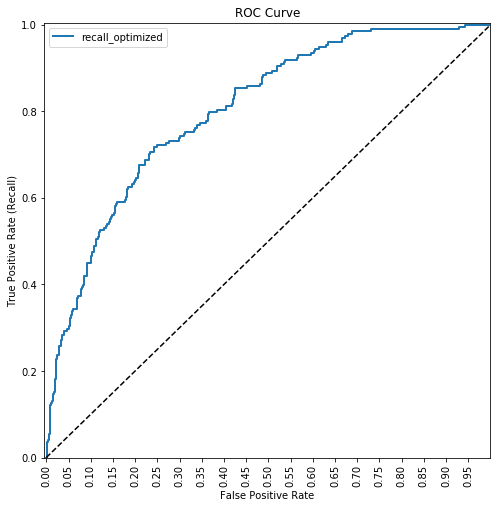

In [35]:
fpr, tpr, auc_thresholds = roc_curve(y_real, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [36]:
y = val_labels[:,1][val_labels[:,1]>0]
yhat = val_outputs[:,1][val_labels[:,1]>0]

In [37]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

1034.0955

In [38]:
y = np.array(Y_val)  #so we can tune the cut point
p = val_outputs[:,0]
f2 = val_outputs[:,1]
yhat = (1-p)*f2

In [39]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

929.3790086242423

In [40]:
print(np.cov(y, p))

[[ 9.70960988e+05 -3.24511805e+01]
 [-3.24511805e+01  2.94677679e-02]]


In [41]:
print(np.cov(f2, p))

[[ 7.62949849e+04 -2.65656297e+01]
 [-2.65656297e+01  2.94677679e-02]]
